# Logistic Regression - Diabet Prediction

Business Problem: Can you develop a machine learning model that can predict whether people have diabetes or not when their characteristics are specified? 
___

About Dataset: The dataset is part of the large dataset maintained at the National Institutes of Diabetes-Digestive-Kidney Diseases in the USA. Data used for diabetes research on Pima Indian women aged 21 years and older living in Phoenix, the 5th largest city of Arizona State in the USA. It consists of 768 observations and 8 numerical independent variables. The target variable is specified as "outcome"; 1 indicates positive diabetes test result, 0 indicates negative.
___

Variables:

Pregnancies: Number of pregnancies<br>
Glucose<br>
BloodPressure: Blood pressure.<br>
SkinThickness: Skin Thickness<br>
Insulin<br>
BMI: Body mass index.<br>
DiabetesPedigreeFunction: A function that calculates our probability of having diabetes based on our ancestry.<br>
Age: Age (years)<br>
Outcome: Information whether the person has diabetes or not. Have the disease (1) or not (0)<br>

**Import Libraries**

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

**Read data**

In [4]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


## 1) Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Check missing values**

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Check unique values**

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**Check numerical variables**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


**Numerical variables analysis**

In [17]:
def num_summary(dataframe, numerical_col, plot=False):
    print(numerical_col.upper())
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        sns.histplot(data=dataframe, x=col)
# 
        plt.title(numerical_col)
        plt.xlabel(numerical_col)
        plt.show()
       
    print(100*'-', '\n')

PREGNANCIES
count   768.000
mean      3.845
std       3.370
min       0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
max      17.000
Name: Pregnancies, dtype: float64


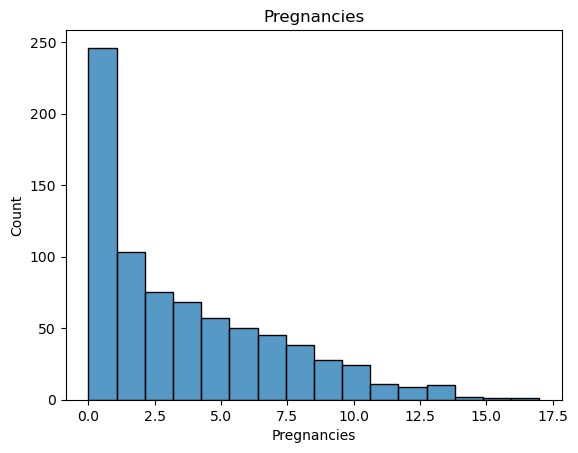

---------------------------------------------------------------------------------------------------- 

GLUCOSE
count   768.000
mean    120.895
std      31.973
min       0.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
max     199.000
Name: Glucose, dtype: float64


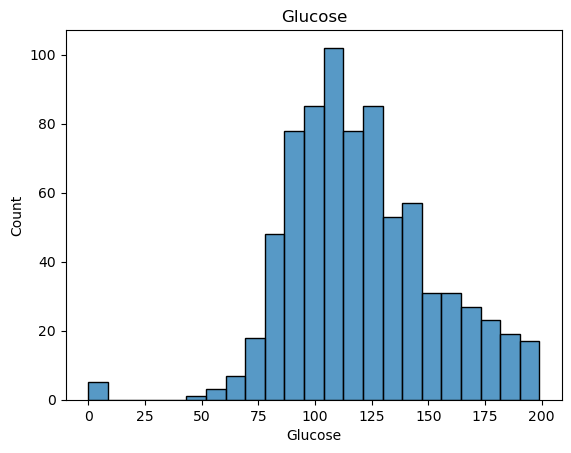

---------------------------------------------------------------------------------------------------- 

BLOODPRESSURE
count   768.000
mean     69.105
std      19.356
min       0.000
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
max     122.000
Name: BloodPressure, dtype: float64


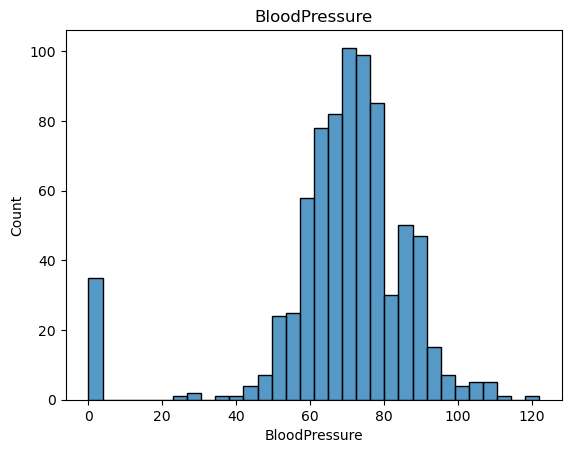

---------------------------------------------------------------------------------------------------- 

SKINTHICKNESS
count   768.000
mean     20.536
std      15.952
min       0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
max      99.000
Name: SkinThickness, dtype: float64


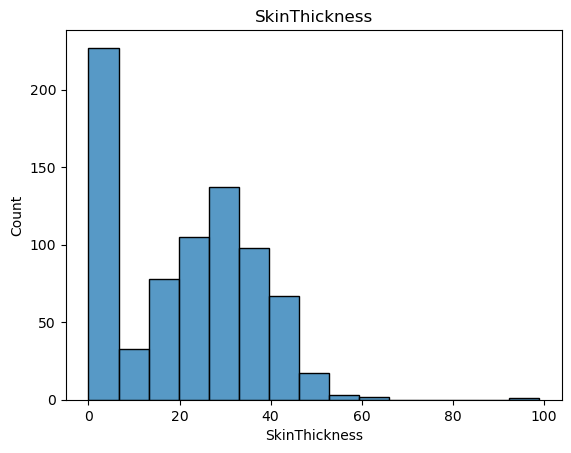

---------------------------------------------------------------------------------------------------- 

INSULIN
count   768.000
mean     79.799
std     115.244
min       0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
max     846.000
Name: Insulin, dtype: float64


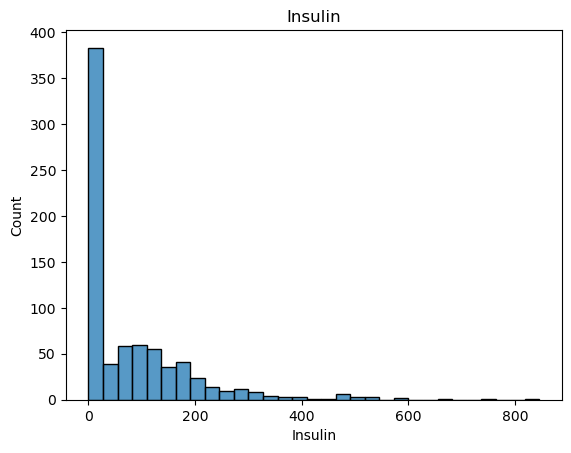

---------------------------------------------------------------------------------------------------- 

BMI
count   768.000
mean     31.993
std       7.884
min       0.000
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
max      67.100
Name: BMI, dtype: float64


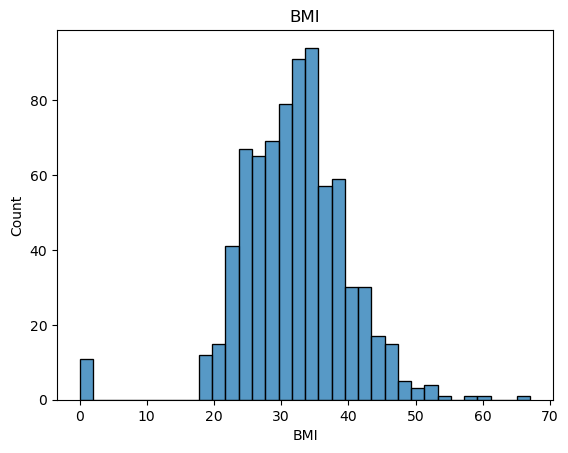

---------------------------------------------------------------------------------------------------- 

DIABETESPEDIGREEFUNCTION
count   768.000
mean      0.472
std       0.331
min       0.078
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


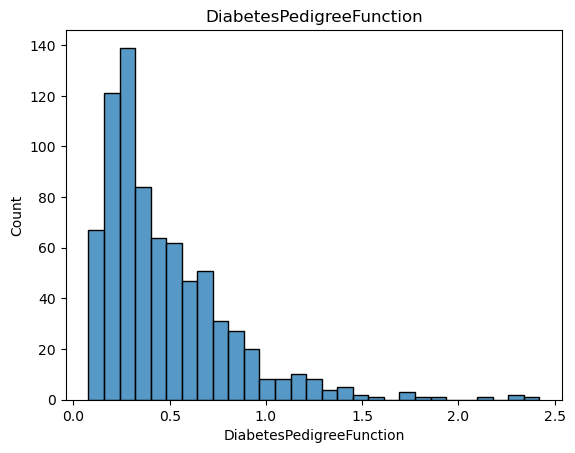

---------------------------------------------------------------------------------------------------- 

AGE
count   768.000
mean     33.241
std      11.760
min      21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
max      81.000
Name: Age, dtype: float64


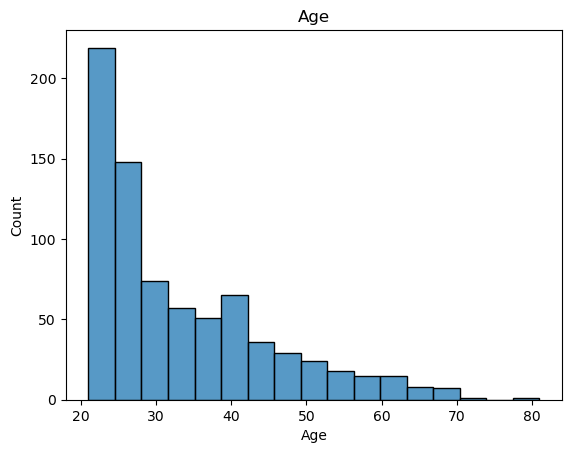

---------------------------------------------------------------------------------------------------- 



In [18]:
for col in df.columns[:-1]:
    num_summary(df, col, plot=True)

**Target variables analysis**

In [86]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': round(100*(dataframe[col_name].value_counts()) / len(dataframe), 2)}))
    
    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show()

   Outcome  Ratio
0      500 65.100
1      268 34.900


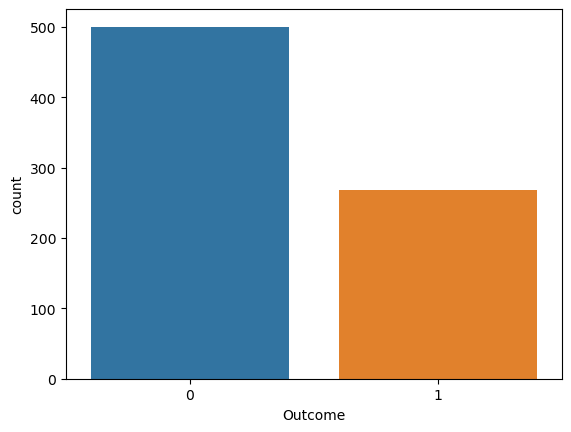

In [87]:
cat_summary(df, 'Outcome', plot=True)

In [19]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: 'mean'}))

In [22]:
for col in df.columns[:-1]:
    target_summary_with_num(df, 'Outcome', col)

         Pregnancies
Outcome             
0              3.298
1              4.866
         Glucose
Outcome         
0        109.980
1        141.257
         BloodPressure
Outcome               
0               68.184
1               70.825
         SkinThickness
Outcome               
0               19.664
1               22.164
         Insulin
Outcome         
0         68.792
1        100.336
           BMI
Outcome       
0       30.304
1       35.143
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
           Age
Outcome       
0       31.190
1       37.067


## 2) Data Preprocessing

**Outlier Control**

In [3]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [29]:
for col in df.columns[:-1]:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


**There is outliers in Insulin variable and we will replace them with limits**

In [27]:
replace_with_thresholds(df, 'Insulin')

In [28]:
print('Insulin', check_outlier(df, 'Insulin'))

Insulin False


**Scaling with Robust**

In [35]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [37]:
for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235,1
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118,0
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176,1
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471,0
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235,1


## 2) Modelling

In [41]:
X = df.drop('Outcome', axis=1)
y = df[['Outcome']]

In [44]:
log_model = LogisticRegression()

In [47]:
log_model.fit(X, y)

LogisticRegression()

In [48]:
log_model.intercept_

array([-1.23439588])

In [49]:
log_model.coef_

array([[ 0.59906785,  1.41770936, -0.23152362,  0.01973855, -0.14571255,
         0.81741997,  0.35522795,  0.25655154]])

In [63]:
df_coeff = pd.DataFrame([cols, log_model.coef_.tolist()[0]]).T
df_coeff.columns = ['Feature', 'Coefficient']
df_coeff

,Feature,Coefficient
0,Pregnancies,0.599
1,Glucose,1.418
2,BloodPressure,-0.232
3,SkinThickness,0.020
4,Insulin,-0.146
5,BMI,0.817
6,DiabetesPedigreeFunction,0.355
7,Age,0.257


In [64]:
y_predictions = log_model.predict(X)

**Compare first 10 units**

In [83]:
# predictions
y_predictions[0:10].tolist()

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [84]:
# real values
y[0:10]['Outcome'].tolist()

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1]

##  3) Model Evaulation

In [88]:
def plot_confusion_matrix(y, y_predictions):
    acc = round(accuracy_score(y, y_predictions), 2)
    cm = confusion_matrix(y, y_predictions)
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.xlabel('y predictions')
    plt.ylabel('y')
    plt.title(f'Accuracy Score: {acc}')
    plt.show()

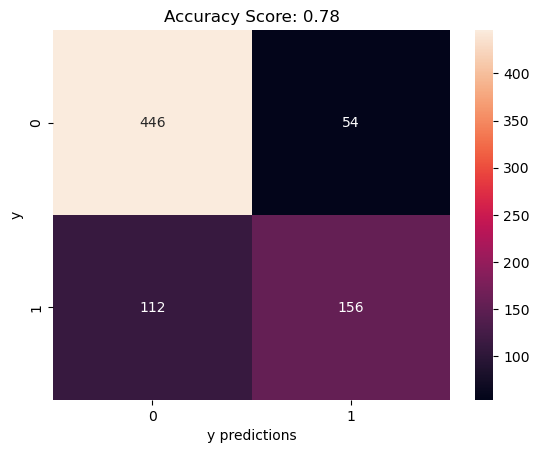

In [89]:
plot_confusion_matrix(y, y_predictions)

In [91]:
print(classification_report(y, y_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



In [100]:
# ROC AUC

y_probability = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_probability)

0.8393955223880598

## 4) Model Validation - Holdout 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [103]:
log_model = LogisticRegression().fit(X_train, y_train)

In [104]:
y_predictions = log_model.predict(X_test)

In [110]:
y_probability = log_model.predict_proba(X_test)[:, 1]

In [112]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.53      0.63        57

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



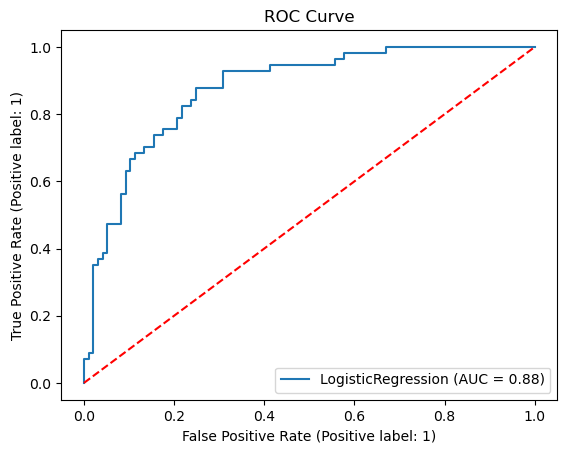

In [121]:
plot_roc_curve(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [123]:
roc_auc_score(y_test, y_probability)

0.8755652016639537

## 4) Model Validation - 10 Fold Cross Validation

In [125]:
cv_results = cross_validate(log_model, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [127]:
cv_results['test_accuracy'].mean()

0.7721925133689839

In [128]:
cv_results['test_precision'].mean()

0.7192472060223519

In [129]:
cv_results['test_recall'].mean()

0.5747030048916841

In [130]:
cv_results['test_f1'].mean()

0.6371421090986309

In [131]:
cv_results['test_roc_auc'].mean()

0.8327295597484277